In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
dig=load_digits()

In [4]:
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
dig["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(dig.data,dig.target)

In [16]:
X_train.shape

(1347, 64)

In [17]:
y_train.shape

(1347,)

In [18]:
X_test.shape

(450, 64)

In [19]:
y_test.shape

(450,)

In [21]:
from sklearn import linear_model
reg=linear_model.LogisticRegression()

In [23]:
reg.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
train_pred=reg.predict(X_train)

In [27]:
from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(train_pred,y_train)
print("The training accuracy is :",training_accuracy)

The training accuracy is : 1.0


In [28]:
test_pred=reg.predict(X_test)

In [29]:
testing_accuracy=accuracy_score(test_pred,y_test)
print("The testing accuracy is:",testing_accuracy)

The testing accuracy is: 0.9666666666666667


In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,test_pred,average="macro")

0.9359100667870962

In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 37,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 45,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 38]], dtype=int64)

Text(114.0, 0.5, 'Actual value')

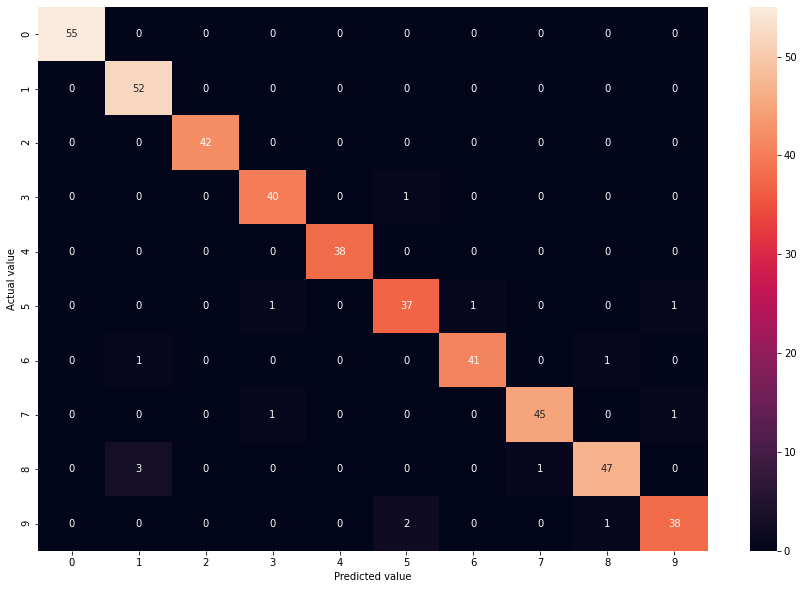

In [36]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")